# LETS GROW MORE DATA SCIENCE INTERN MARCH 2023

# Intermediate level task :


## Task 5: Prediction using Decision Tree Algorithm

**In this project, first I Created the Decision Tree classifier for "Iris flower dataset" and then visualize it graphically.**

**Dataset Link:** http://archive.ics.uci.edu/ml/machine-learning-databases/iris



# Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
#iris_data = pd.read_csv('iris.csv',names=columns)
df=pd.read_csv('iris.csv', names=columns)

In [30]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.shape

(150, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [34]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
Species          object
dtype: object

In [36]:
df.sample(15)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
44,5.1,3.8,1.9,0.4,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor


# Visualization

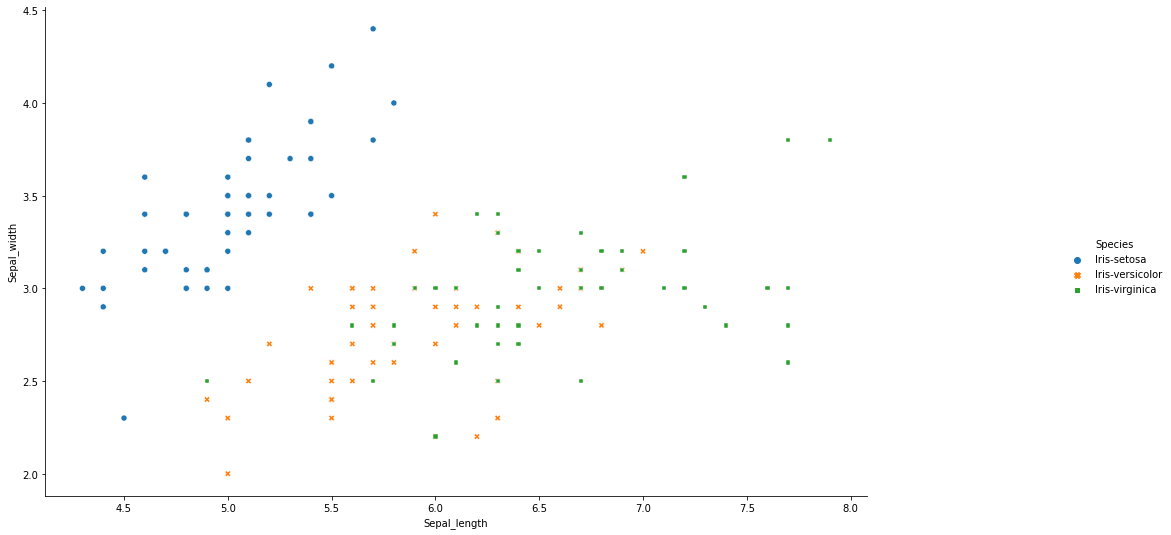

In [37]:
g=sns.relplot(x='Sepal_length',y='Sepal_width', data=df, hue='Species',style='Species')
g.fig.set_size_inches(18,8)
plt.show()

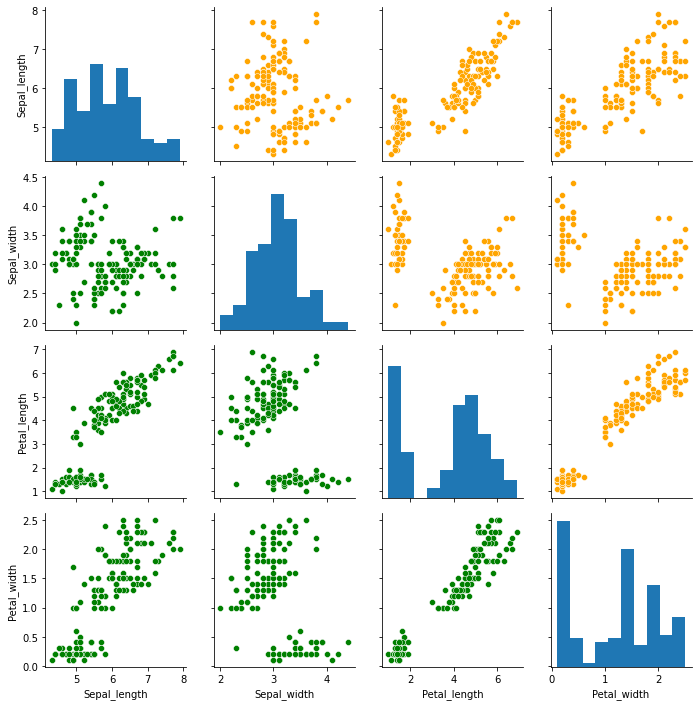

In [39]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='Orange')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

In [40]:
Species =df.values[:,4] 

In [41]:
columns_except_species=df.columns[:4]
columns_except_species

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'], dtype='object')

# Building Model

In [42]:
X_train = df.drop('Species', axis=1)
Y_train = df['Species']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3,random_state=100)

# Decision tree Classifier Model

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt=dt.fit(x_train, y_train)

In [46]:
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))

Training Accuracy is:  100.0


In [47]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))

Test Accuracy is:  95.55555555555556


In [61]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
import pydotplus


[Text(0.4, 0.9, 'Petal_length <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]\nclass = Iris-versicolor'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'Petal_width <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]\nclass = Iris-versicolor'),
 Text(0.2, 0.5, 'Petal_length <= 5.0\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'Sepal_length <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.8, 0.5, 'Petal_length <= 4.85\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'Sepal_width <= 3.1\nentropy = 0.811\ns

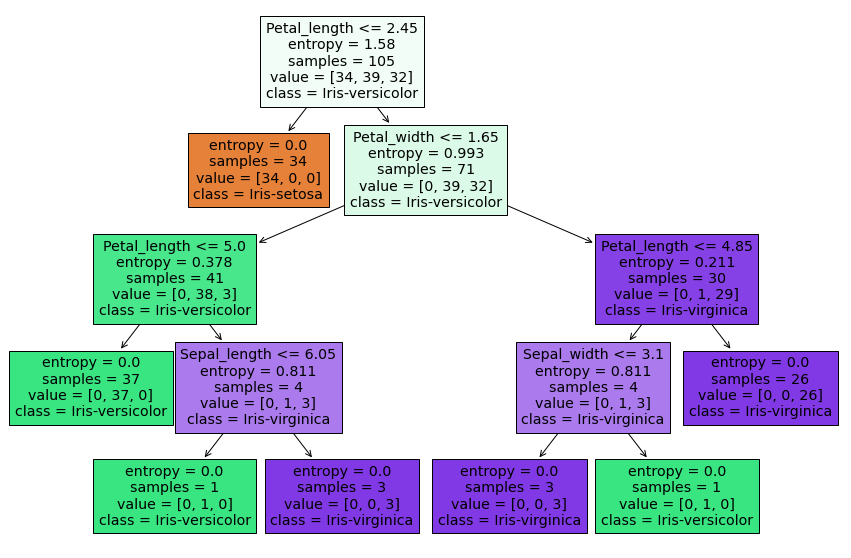

In [56]:
from sklearn import tree
feature_name =  ['Sepal_length','Sepal_width','Petal_length','Petal_width']
class_name= df.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled = True, feature_names = feature_name, class_names= class_name)

In [59]:
y_pred = dt.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

# Confusion matrics and acuuracy score

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
conf_mat = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [65]:
print("Confusion Matrix")
print(conf_mat)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)
print("Classification Report")
print(class_rep)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)
print("Accuracy Score")
print(accuracy)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)

Confusion Matrix
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy Score
0.9555555555555556
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
